In [1]:
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [2]:
img_path = r"D:\cancer_data\divide\train\Maligon\M5\M7272.jpg"

In [3]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
# img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [4]:
img = cv2.resize(img, (512,512))
# img = np.array(img)

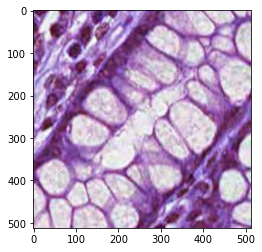

In [5]:
plt.imshow(img)

In [6]:
def relu(x):
    return np.maximum(0, x)

In [7]:
def Convolution(image, kernel_size, n_filter, stride=2, padding=0):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     filter_map = np.zeros((kernel_size, kernel_size))
    filter_map = np.array((1, 2, 1, 0, 0, 0, -1, -2, -1)).reshape(3,3) #sobel_x
    filter_map2 = np.array((-1, 0, 1, -2, 0, 2, -1, 0, 1)).reshape(3,3) #sobel_y
    output_size = int(np.trunc((image.shape[0] - kernel_size + 2*padding)/stride) + 1)
    new_filter_list = np.zeros((n_filter, output_size, output_size))
    
    if padding != 0:
        image = np.pad(image, ((padding, padding),(padding, padding)), 'constant', constant_values=0)
    
    for i in range(n_filter):
        new_filter = np.zeros((output_size,output_size))
        nf_x = 0
        nf_y = 0
        
        for y in range(0,image.shape[1] - kernel_size + 1, stride):

            for x in range(0,image.shape[0] - kernel_size + 1, stride):
                tmp_sum = 0 
                tmp_sum2 = 0
                for k_y in range(kernel_size):
                    
                    for k_x in range(kernel_size):
                        tmp = np.dot(image[x+k_x, y+k_y], filter_map[k_x, k_y])
                        tmp2 = np.dot(image[x+k_x, y+k_y], filter_map2[k_x, k_y])
                        tmp_sum += tmp
                        tmp_sum2 += tmp2

                new_filter[nf_x, nf_y] = tmp_sum + tmp_sum2
#                 new_filter = relu(new_filter)
                nf_x += 1
            nf_x = 0
            nf_y += 1
            
        new_filter_list[i] = new_filter
        
    return new_filter_list

In [8]:
def MaxPooling(img, kernel_size, n_filter, stride=2, padding=0):
    output_size = int(np.trunc((img.shape[1] - kernel_size + 2*padding)/stride) + 1)
    new_filter_list = np.zeros((n_filter, output_size, output_size))
    
    if padding != 0:
        img = np.pad(img, ((padding, padding),(padding, padding)), 'constant', constant_values=0)
    
    for i in range(n_filter):
        new_filter = np.zeros((output_size, output_size))
        nf_x = 0
        nf_y = 0
        
        for y in range(0, img.shape[1] - kernel_size + 1, stride):
            
            for x in range(0, img.shape[2] - kernel_size + 1, stride):
                tmp_list = np.arange(kernel_size * kernel_size)
                for k_y in range(kernel_size):
                    
                    for k_x in range(kernel_size):
                        tmp_list = np.append(tmp_list, img[0][x+k_x, y+k_y])

                new_filter[nf_x, nf_y] = np.max(tmp_list)
                nf_x += 1
            nf_x = 0
            nf_y += 1
        
        new_filter_list[i] = new_filter
        
    return new_filter_list

In [9]:
def Gaussian(img, kernel_size):
    mask = np.zeros((kernel_size, kernel_size))
    
    for i in range(img.shape[0]):
        channel = img[i]
        nf_x = 0
        nf_y = 0
        
        for y in range(img.shape[2]):
            
            for x in range(img.shape[1]):
                
                for m_y in range(kernel_size):
                    
                    for m_x in range(kernel_size):
                        channel[n]
                        
                         
                        
    return img

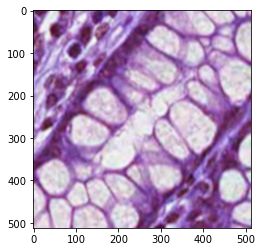

In [10]:
e = cv2.GaussianBlur(img, (9, 9), 0)
plt.imshow(e)

In [11]:
nn = Convolution(e,3,8,stride=3)

In [12]:
img.shape

(512, 512, 3)

In [13]:
nn.shape

(8, 170, 170)

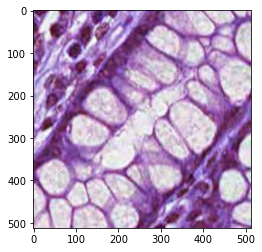

In [14]:
plt.imshow(img)

In [15]:
a = Image.fromarray(nn[0])

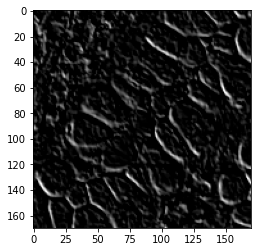

In [16]:
plt.imshow(a)

In [17]:
tmp = np.zeros((nn.shape[1], nn.shape[2]))
for n in nn:
    tmp = tmp + n
# tmp = tmp/nn.shape[0]
tmp = Image.fromarray(tmp)

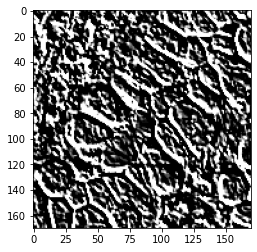

In [18]:
plt.imshow(tmp)

In [19]:
mm = MaxPooling(nn, 2, 32)

In [20]:
mm.shape

(32, 85, 85)

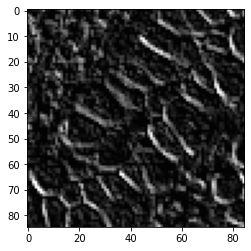

In [21]:
b = Image.fromarray(mm[0])
plt.imshow(b)

In [22]:
tmp2 = np.zeros((mm.shape[1], mm.shape[2]))
for m in mm:
    tmp2 = tmp2 + m
# tmp2 = tmp2/nn.shape[0]
tmp2 = Image.fromarray(tmp2)

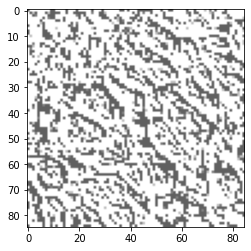

In [23]:
plt.imshow(tmp2)